In [1]:
#Imports
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, plot_confusion_matrix,precision_score,f1_score,recall_score
from sklearn.linear_model import Perceptron
from sklearn import tree
from sklearn.metrics import confusion_matrix,mean_squared_error, r2_score,classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_blobs
from sklearn.tree import export_graphviz,export_text
from sklearn.naive_bayes import GaussianNB,BernoulliNB,CategoricalNB
from sklearn.preprocessing import StandardScaler,OrdinalEncoder
from sklearn.model_selection import learning_curve
from mlxtend.plotting import plot_learning_curves
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from six import StringIO
from IPython.display import Image
import pydotplus
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import warnings
import json
warnings.filterwarnings("ignore")

In [2]:
#Names of columns from our database
df = pd.read_csv("covid_data.csv")
for col in df.columns:
    print(col)
#We change name for future
df.rename(columns= {'DATE_DIED':"DEATH"},inplace=True)

USMER
MEDICAL_UNIT
SEX
PATIENT_TYPE
DATE_DIED
INTUBED
PNEUMONIA
AGE
PREGNANT
DIABETES
COPD
ASTHMA
INMSUPR
HIPERTENSION
OTHER_DISEASE
CARDIOVASCULAR
OBESITY
RENAL_CHRONIC
TOBACCO
CLASIFFICATION_FINAL
ICU


In [3]:
df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DEATH,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


In [4]:
df.tail()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DEATH,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
1048570,2,13,2,1,9999-99-99,97,2,40,97,2,...,2,2,2,2,2,2,2,2,7,97
1048571,1,13,2,2,9999-99-99,2,2,51,97,2,...,2,2,1,2,2,2,2,2,7,2
1048572,2,13,2,1,9999-99-99,97,2,55,97,2,...,2,2,2,2,2,2,2,2,7,97
1048573,2,13,2,1,9999-99-99,97,2,28,97,2,...,2,2,2,2,2,2,2,2,7,97
1048574,2,13,2,1,9999-99-99,97,2,52,97,2,...,2,2,2,2,2,2,2,2,7,97


In [5]:
#All columns I wanna include
cols =['USMER','MEDICAL_UNIT','SEX','PATIENT_TYPE','DEATH','INTUBED','PNEUMONIA','AGE','PREGNANT','DIABETES',
          'COPD','ASTHMA','HIPERTENSION','OTHER_DISEASE',
          'CARDIOVASCULAR','OBESITY','RENAL_CHRONIC','TOBACCO']

In [6]:
#Change values in columns to more friendly
def change(column,points,names=None):
    if not names:
        names= range(len(points)+1)
    colCut= pd.cut(column,bins = [column.min()]+ points+[column.max()],labels=names,include_lowest=True)
    return colCut

In [7]:
df['INTUBED']=change(df['INTUBED'],[90],[1,0])
df['PREGNANT']=change(df['PREGNANT'],[97],[0,1])
df['HIPERTENSION']=change(df['HIPERTENSION'],[90],[0,1])
df['PNEUMONIA']=change(df['PNEUMONIA'],[90],[0,1])
df['TOBACCO']=change(df['TOBACCO'],[90],[0,1])
df['OTHER_DISEASE']=change(df['OTHER_DISEASE'],[90],[0,1])
df['CARDIOVASCULAR']=change(df['CARDIOVASCULAR'],[90],[0,1])
df['OBESITY']=change(df['OBESITY'],[90],[0,1])
df['RENAL_CHRONIC']=change(df['RENAL_CHRONIC'],[90],[0,1])
df['ASTHMA']=change(df['ASTHMA'],[90],[0,1])
df['COPD']=change(df['COPD'],[90],[0,1])
df['DIABETES']=change(df['DIABETES'],[90],[0,1])
df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DEATH,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,0,0,65,0,0,...,0,2,0,0,0,0,0,0,3,97
1,2,1,2,1,03/06/2020,0,0,72,0,0,...,0,2,0,0,0,0,0,0,5,97
2,2,1,2,2,09/06/2020,1,0,55,0,0,...,0,2,0,0,0,0,0,0,3,2
3,2,1,1,1,12/06/2020,0,0,53,0,0,...,0,2,0,0,0,0,0,0,7,97
4,2,1,2,1,21/06/2020,0,0,68,0,0,...,0,2,0,0,0,0,0,0,3,97


In [8]:
df.drop(df.loc[df['CLASIFFICATION_FINAL']==4].index, inplace=True)
df.drop(df.loc[df['CLASIFFICATION_FINAL']==5].index, inplace=True)
df.drop(df.loc[df['CLASIFFICATION_FINAL']==6].index, inplace=True)
df.drop(df.loc[df['CLASIFFICATION_FINAL']==7].index, inplace=True)
df = df.drop('INMSUPR', axis=1)
df = df.drop('CLASIFFICATION_FINAL', axis=1)
df = df.drop('ICU', axis=1)
df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DEATH,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO
0,2,1,1,1,03/05/2020,0,0,65,0,0,0,0,0,0,0,0,0,0
2,2,1,2,2,09/06/2020,1,0,55,0,0,0,0,0,0,0,0,0,0
4,2,1,2,1,21/06/2020,0,0,68,0,0,0,0,0,0,0,0,0,0
5,2,1,1,2,9999-99-99,1,0,40,0,0,0,0,0,0,0,0,0,0
6,2,1,1,1,9999-99-99,0,0,64,0,0,0,0,0,0,0,0,0,0


In [9]:
df_for_stats = df.iloc[:1000000]
cols_for_stats=cols
cols_for_stats.remove("DEATH")
for col in cols:
    print("For ",col,
          ":\nMean: ",df_for_stats[col].astype('int').mean(),
         "\nMin: ",df_for_stats[col].astype('int').min(),
         "\nMax: ",df_for_stats[col].astype('int').max(),
         "\nStd: ",df_for_stats[col].astype('int').std())

For  USMER :
Mean:  1.6246584638462775 
Min:  1 
Max:  2 
Std:  0.48421159170137884
For  MEDICAL_UNIT :
Mean:  8.697948104362734 
Min:  1 
Max:  13 
Std:  3.764234679730042
For  SEX :
Mean:  1.5344393449649087 
Min:  1 
Max:  2 
Std:  0.4988131576887579
For  PATIENT_TYPE :
Mean:  1.2839233734460265 
Min:  1 
Max:  2 
Std:  0.45090066548675384
For  INTUBED :
Mean:  0.280063472788083 
Min:  0 
Max:  1 
Std:  0.4490305539534914
For  PNEUMONIA :
Mean:  1.0204628309169623e-05 
Min:  0 
Max:  1 
Std:  0.0031944561678228078
For  AGE :
Mean:  45.18718604823218 
Min:  0 
Max:  120 
Std:  16.460983539751734
For  PREGNANT :
Mean:  0.0035282502378953975 
Min:  0 
Max:  1 
Std:  0.05929427170932646
For  DIABETES :
Mean:  0.0036736661913010647 
Min:  0 
Max:  1 
Std:  0.06049941905265965
For  COPD :
Mean:  0.003349669242484929 
Min:  0 
Max:  1 
Std:  0.057779386249598524
For  ASTHMA :
Mean:  0.0033394646141757596 
Min:  0 
Max:  1 
Std:  0.057691603213434015
For  HIPERTENSION :
Mean:  0.00354100602

In [10]:
repSex = {1: "Female", 2: "Male"}
df.replace({"SEX": repSex},inplace=True)
df['AGE']=change(df['AGE'],[1,11,18,60],["Unknown","Child","Teenager","Adult","Senior"])
repDate={"9999-99-99":0}
df.replace({"DEATH":repDate},inplace=True)
df.loc[df["DEATH"] != 0,"DEATH"]=1
#https://www.kaggle.com/datasets/meirnizri/covid19-dataset


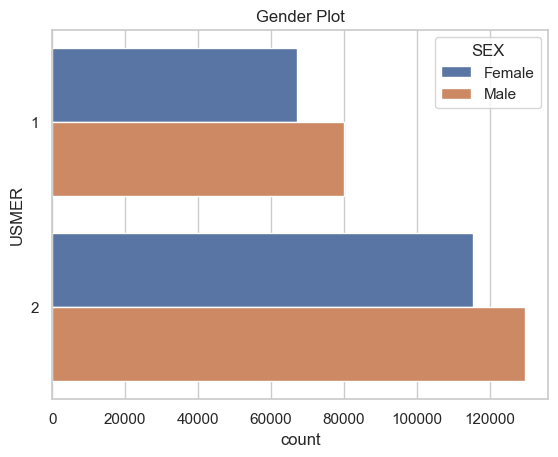

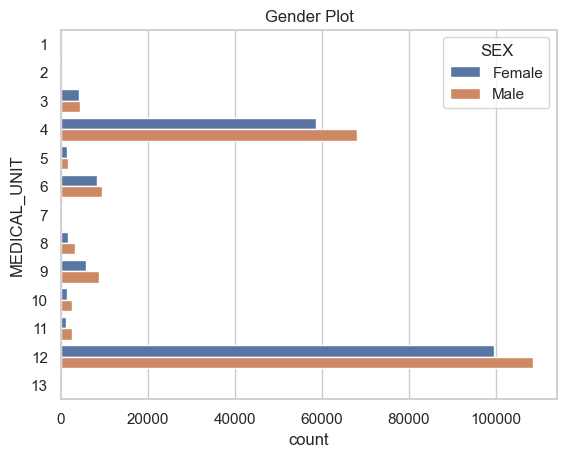

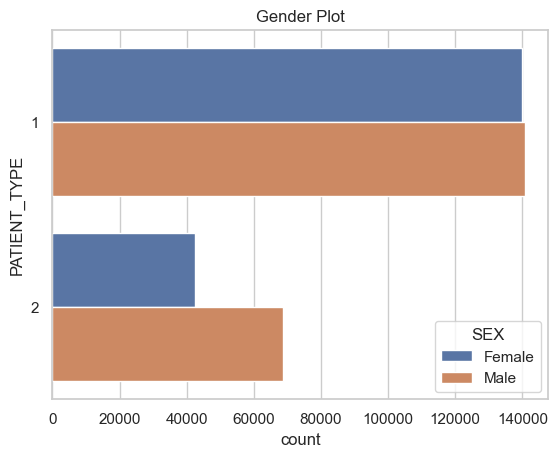

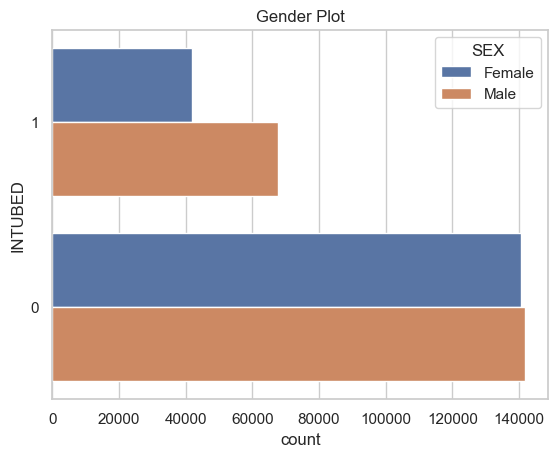

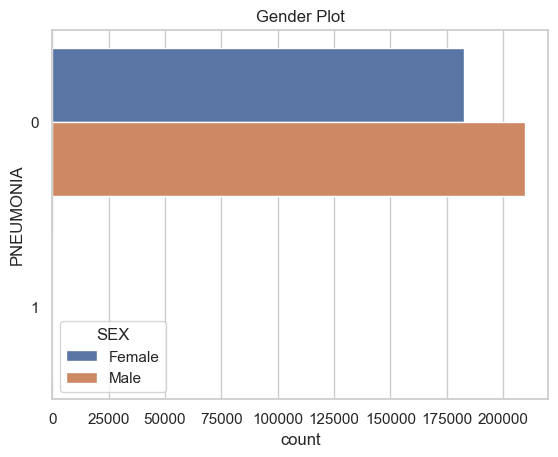

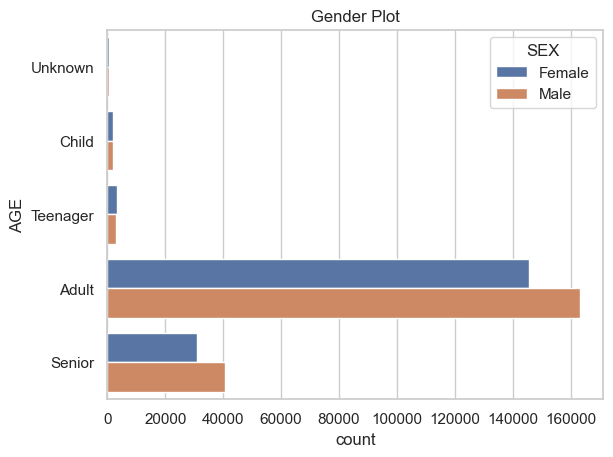

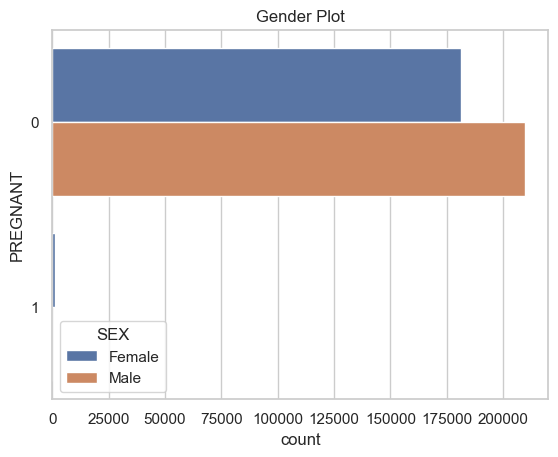

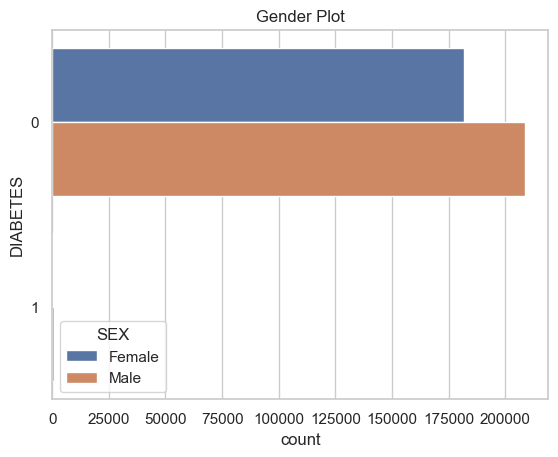

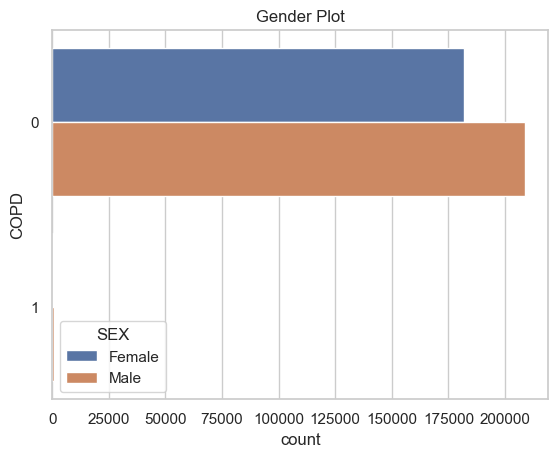

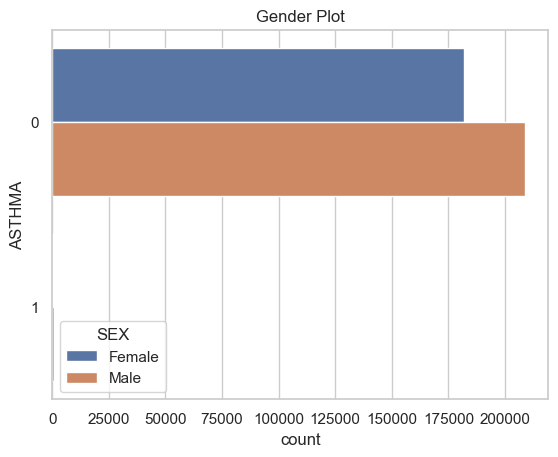

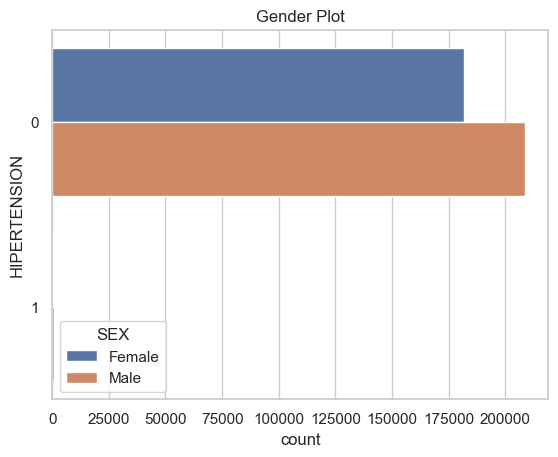

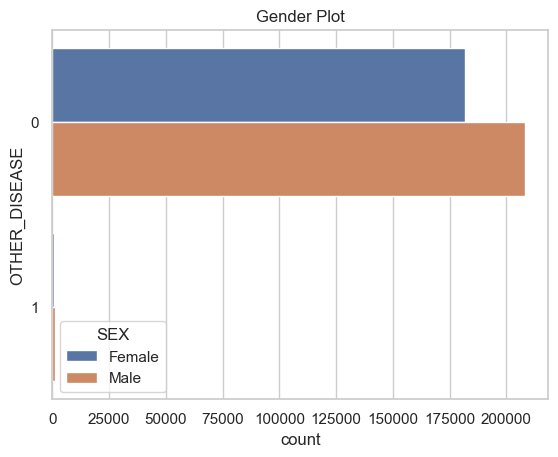

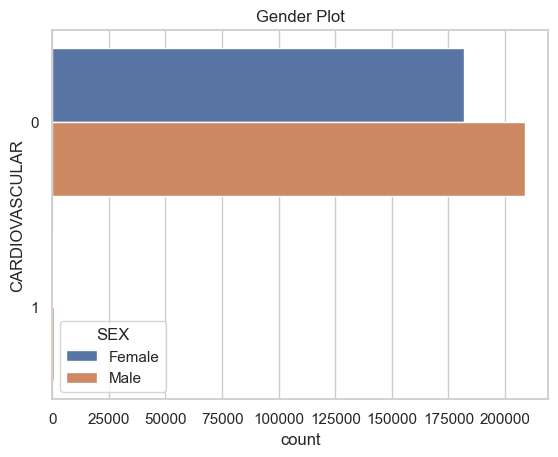

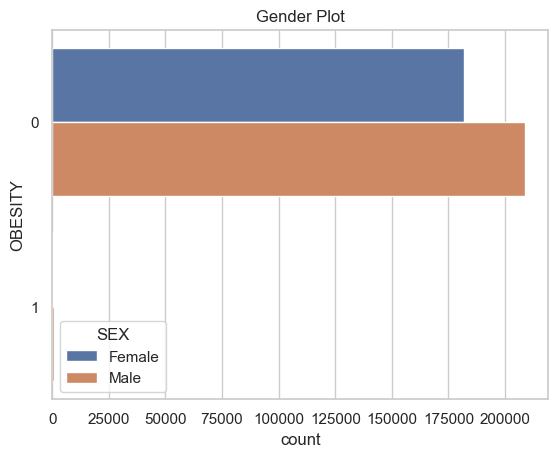

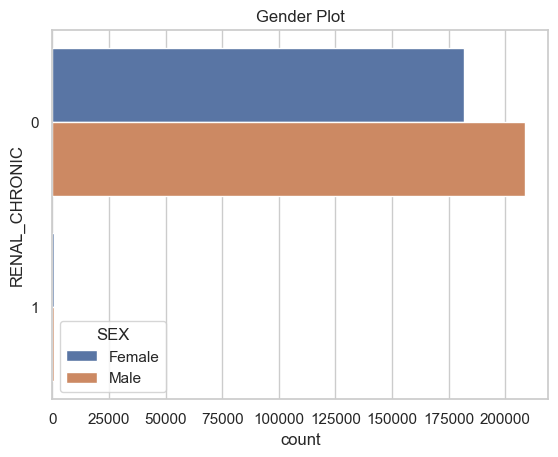

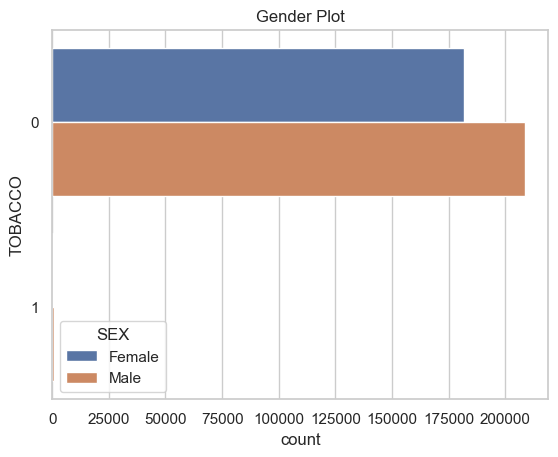

In [11]:
new_cols=cols
new_cols.remove("SEX")
for x in new_cols:
    sns.set(style="whitegrid")
    ax = sns.countplot(y=x, hue="SEX", data=df)
    plt.ylabel(x)
    plt.title('Gender Plot')
    plt.show()
    

In [12]:
#Checking if there are any people who had covid who where obese
df.loc[df['OBESITY']== 1]

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DEATH,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO
790,2,3,Male,2,1,1,0,Senior,0,1,1,1,1,1,1,1,1,1
853,2,3,Female,2,1,1,0,Senior,0,1,1,1,1,1,1,1,1,1
1210,2,3,Male,2,1,1,0,Senior,0,1,1,1,1,1,1,1,1,1
1352,2,3,Male,2,1,1,0,Adult,0,1,1,1,1,1,1,1,1,1
1980,2,3,Female,2,0,1,0,Adult,0,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
656672,1,12,Female,1,0,0,0,Adult,0,0,1,1,1,1,1,1,1,0
657675,2,12,Female,2,0,1,0,Adult,0,0,0,0,0,0,0,1,0,0
658462,2,12,Male,1,0,0,0,Adult,0,0,0,0,0,0,0,1,0,0
658876,1,12,Female,1,0,0,0,Adult,0,1,1,1,1,1,1,1,1,1


In [13]:
repSex = {"Female": 1,  "Male" : 2}
df.replace({"SEX": repSex},inplace=True)

## Naive Bayes

In [14]:
#Naive-Bayes
def naive_Bayes(X,y,typ):
    y.astype('int')
    X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=7)
    model=typ
    clf=model.fit(X_train,y_train.astype('int'))
    pred_labels=model.predict(X_test)
    print("Classes: ",clf.classes_)
    print("\n*--------------------------------------------------*\n")
    if str(typ)=='GaussianNB()':
        print("Class Priors: ", clf.class_prior_)
    else:
        print("Class Priors: ", clf.class_log_prior_)
    score=model.score(X_test,y_test.astype('int'))
    print("\n*--------------------------------------------------*\n")
    print("Score: ",score)
    print("\n*--------------------------------------------------*\n")
    print('Training set score: {:.4f}'.format(model.score(X_train, y_train.astype('int'))))
    print('Test set score: {:.4f}'.format(model.score(X_test, y_test.astype('int'))))
    print("\n*--------------------------------------------------*\n")
    print( classification_report(y_test.astype('int'),pred_labels))
    print("\n*--------------------------------------------------*\n")
    y_pred = clf.predict(X_test)
    cm = confusion_matrix(y_test.astype('int'), y_pred.astype('int'))
    cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])
    sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
    return X_train,X_test,y_train.astype('int'),y_test.astype('int'),clf,pred_labels

Classes:  [0 1]

*--------------------------------------------------*

Class Priors:  [0.86210668 0.13789332]

*--------------------------------------------------*

Score:  0.8577478442777693

*--------------------------------------------------*

Training set score: 0.8596
Test set score: 0.8577

*--------------------------------------------------*

              precision    recall  f1-score   support

           0       0.86      1.00      0.92     67401
           1       0.31      0.01      0.02     10995

    accuracy                           0.86     78396
   macro avg       0.59      0.50      0.47     78396
weighted avg       0.78      0.86      0.80     78396


*--------------------------------------------------*



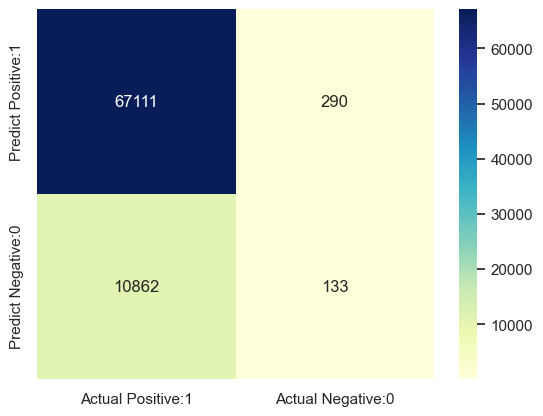

In [15]:
X=df["OTHER_DISEASE"].values.reshape(-1,1)
y=df["DEATH"].values
X_train,X_test,y_train,y_test,clf,pred_labels,=naive_Bayes(X,y,GaussianNB())


Classes:  [0 1]

*--------------------------------------------------*

Class Priors:  [-0.14837625 -1.98127496]

*--------------------------------------------------*

Score:  0.8597504974743609

*--------------------------------------------------*

Training set score: 0.8621
Test set score: 0.8598

*--------------------------------------------------*

              precision    recall  f1-score   support

           0       0.86      1.00      0.92     67401
           1       0.00      0.00      0.00     10995

    accuracy                           0.86     78396
   macro avg       0.43      0.50      0.46     78396
weighted avg       0.74      0.86      0.79     78396


*--------------------------------------------------*



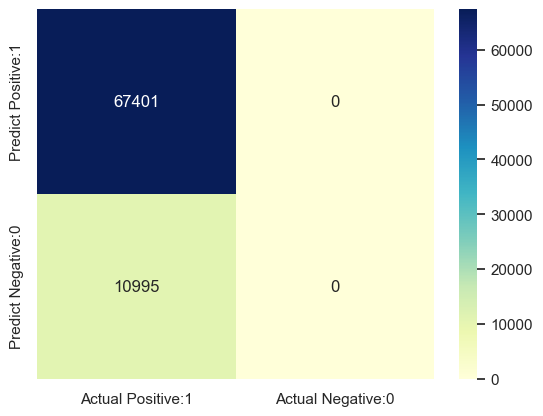

In [16]:
X=df["OTHER_DISEASE"].values.reshape(-1,1)
y=df["DEATH"].values
X_train,X_test,y_train,y_test,clf,pred_labels,=naive_Bayes(X,y,BernoulliNB())

## KNN

In [17]:
#KNN
def knn(X,Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=10)
    knn_model = KNeighborsClassifier(n_neighbors=20)
    knn_model.fit(X_train, Y_train.astype("int"))
    Y_predict_knn = knn_model.predict(X_test)
    #Comparing the output I expected (Y_test) against the ones the model predicted (Y_predict)
    knn_metrics = metrics.classification_report(Y_test.astype("int"),Y_predict_knn.astype("int"))
    print(knn_metrics)
    table = pd.DataFrame(Y_test.astype("int"))
    print('table 1')
    print(table.head())
    #add the predictions to the dataframe
    table['predictions'] = Y_predict_knn.astype("int")
    print('table 2')
    print(table.head())
    accuracy_knn = accuracy_score(Y_test.astype("int"),Y_predict_knn.astype("int"))
    precision_knn = precision_score(Y_test.astype("int"), Y_predict_knn.astype("int"))
    f1_knn = f1_score(Y_test.astype("int"),Y_predict_knn.astype("int"))
    recall_knn = recall_score(Y_test.astype("int"), Y_predict_knn.astype("int"))
    print("Precission: ",precision_knn)
    print("Accuracy: ",accuracy_knn)
    print("F1: ",f1_knn)
    print("Recall: ", recall_knn)
    plt.bar(['Accuracy','F1 Score','Recall Score','Precision Score'],[accuracy_knn,f1_knn,recall_knn,precision_knn],color=['red','green','purple','orange'])
    plt.plot([accuracy_knn,f1_knn,recall_knn,precision_knn],color='black')
    plt.title('Evaluation Metrics for K-Nearest Neighbors')
    plt.show
    cm = confusion_matrix(Y_test.astype('int'), Y_predict_knn.astype('int'))
    cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])
    sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

              precision    recall  f1-score   support

           0       0.86      1.00      0.93    101252
           1       0.00      0.00      0.00     16342

    accuracy                           0.86    117594
   macro avg       0.43      0.50      0.46    117594
weighted avg       0.74      0.86      0.80    117594

table 1
   0
0  0
1  0
2  0
3  0
4  0
table 2
   0  predictions
0  0            0
1  0            0
2  0            0
3  0            0
4  0            0
Precission:  0.0
Accuracy:  0.861030324676429
F1:  0.0
Recall:  0.0


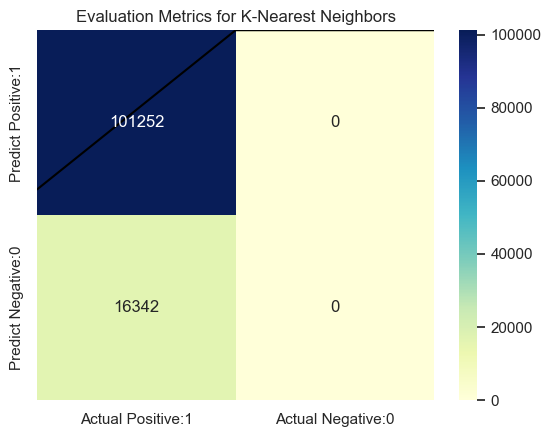

In [18]:
knn(X=df["OTHER_DISEASE"].values.reshape(-1,1),
Y = df["DEATH"].values)

## Decision Trees

Score:  0.8616354447559691


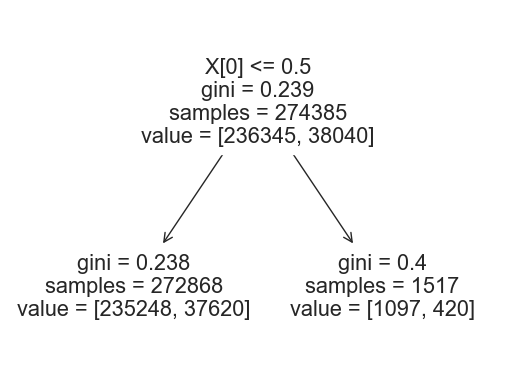

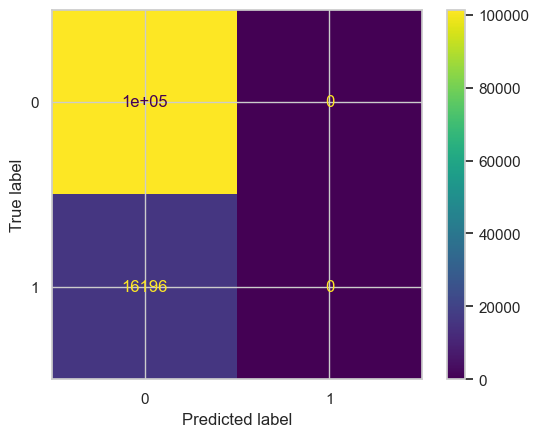

In [19]:
X=df["OTHER_DISEASE"].values.reshape(-1,1)
y = df["DEATH"].values.astype("int")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
tree.plot_tree(clf)
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = ["OTHER_DISEASE"],class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('covid_DT1.png')
Image(graph.create_png())
print("Score: ", clf.score(X,y))
plot_confusion_matrix(clf,X_test,y_test)

In [20]:
#https://scikit-learn.org/stable/modules/tree.html
clf = tree.DecisionTreeRegressor()
clf = clf.fit(X, y)
print(clf.predict(X_test))


[0.13759898 0.13759898 0.13759898 ... 0.13759898 0.13759898 0.13759898]


Score:  0.8616354447559691


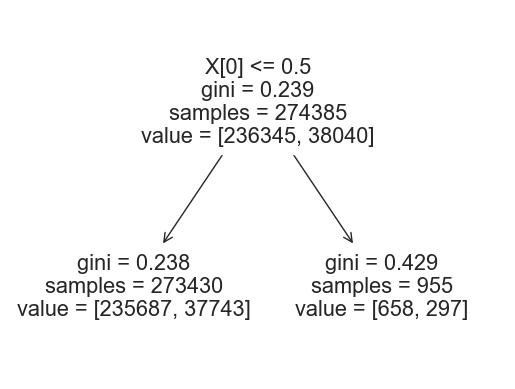

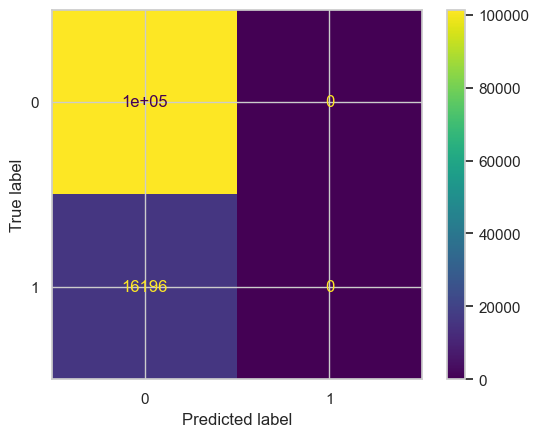

In [21]:
X=df["OBESITY"].values.reshape(-1,1)
y = df["DEATH"].values.astype("int")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
clf = tree.DecisionTreeClassifier(random_state=0, max_depth=2)
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
tree.plot_tree(clf)
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = ["OBESITY"],class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('covid_DT2.png')
Image(graph.create_png())
print("Score: ", clf.score(X,y))
plot_confusion_matrix(clf,X_test,y_test)

Score:  0.8616354447559691


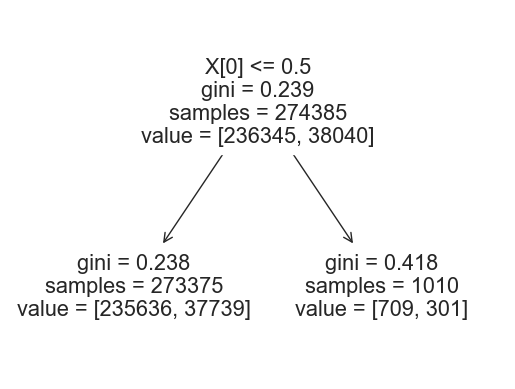

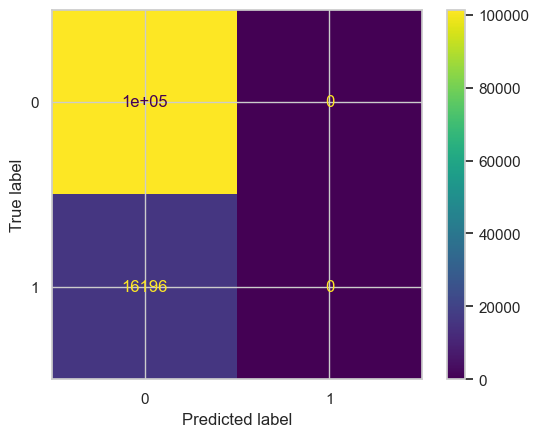

In [22]:
X=df["TOBACCO"].values.reshape(-1,1)
y = df["DEATH"].values.astype("int")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
tree.plot_tree(clf)
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = ["TOBACCO"],class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('covid_DT.png')
Image(graph.create_png())
print("Score: ", clf.score(X,y))
plot_confusion_matrix(clf,X_test,y_test)

Score:  0.9964717497621046


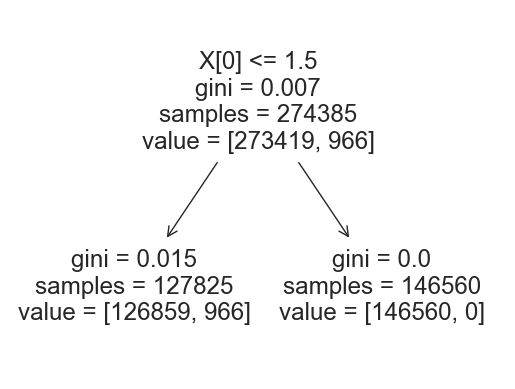

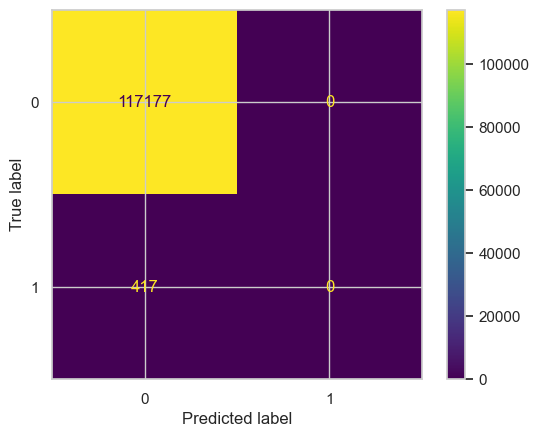

In [23]:
X=df["SEX"].values.reshape(-1,1)
y = df["PREGNANT"].values.astype("int")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
tree.plot_tree(clf)
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = ["TOBACCO"],class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('covid_DT.png')
Image(graph.create_png())
print("Score: ", clf.score(X,y))
plot_confusion_matrix(clf,X_test,y_test)

## Neural Networks

In [24]:
X=df["TOBACCO"].values.reshape(-1,1)
y = df["DEATH"].values.astype("int")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
def neural_network(hidden_layer_sizes,max_iter,activation,solver,learning_rate,X,y):
    scaler = StandardScaler()

    scaler.fit(X_train)

    train_data = scaler.transform(X_train)
    test_data = scaler.transform(X_test)
    print(train_data[:3])

    mlp = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes, max_iter=max_iter,
                        activation=activation,
                        solver=solver,
                        learning_rate=learning_rate)

    mlp.fit(train_data, y_train)

    predictions_train = mlp.predict(train_data)
    predictions_test = mlp.predict(test_data)
    percent = (mlp.score(test_data, y_test))
    print("Percent: ",percent)
    plot_learning_curves(X_train, y_train, X_test, y_test,mlp)
    plt.show()
    return ["Neural Network", percent, mlp]
#https://www.projectpro.io/recipes/plot-learning-curve-in-python

[[-0.06078288]
 [-0.06078288]
 [-0.06078288]]
Percent:  0.8622718846199636


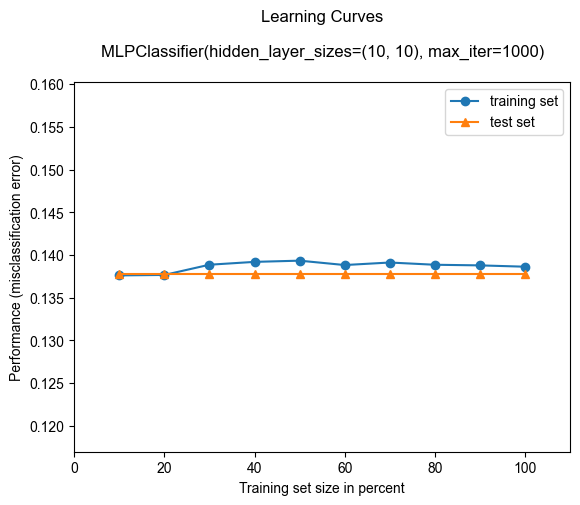

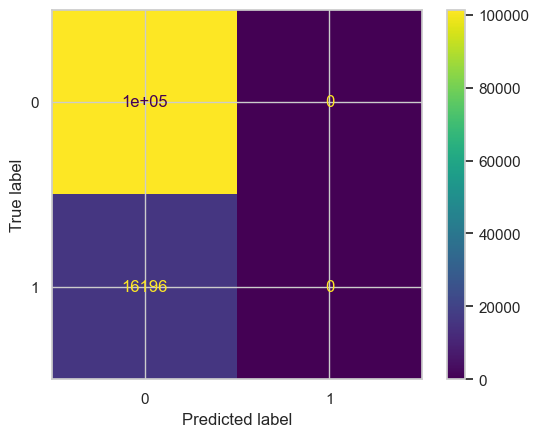

In [25]:
r=neural_network((10, 10),1000,'relu','adam','constant',X,y)
plot_confusion_matrix(r[2],X_test,y_test)

[[-0.06078288]
 [-0.06078288]
 [-0.06078288]]
Percent:  0.8622718846199636


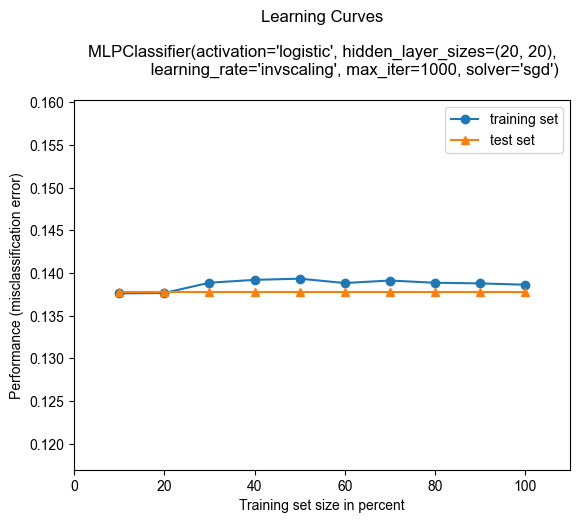

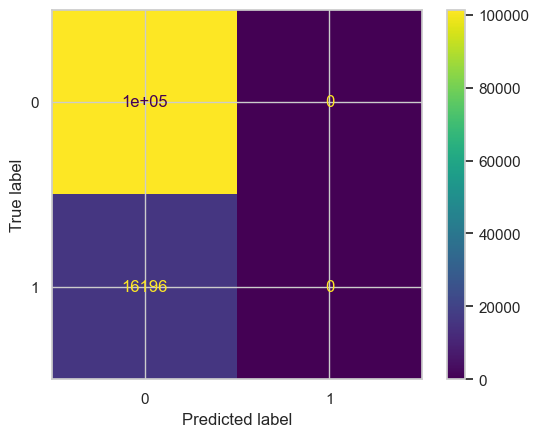

In [26]:
r=neural_network((20, 20),1000,'logistic','sgd','invscaling',X,y)
plot_confusion_matrix(r[2],X_test,y_test)

[[-0.06078288]
 [-0.06078288]
 [-0.06078288]]
Percent:  0.8622718846199636


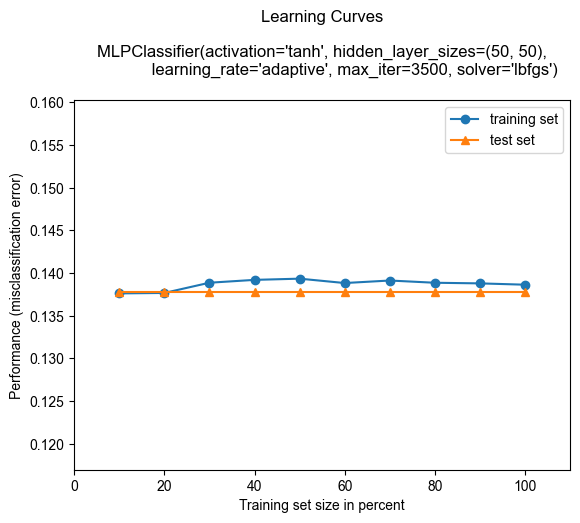

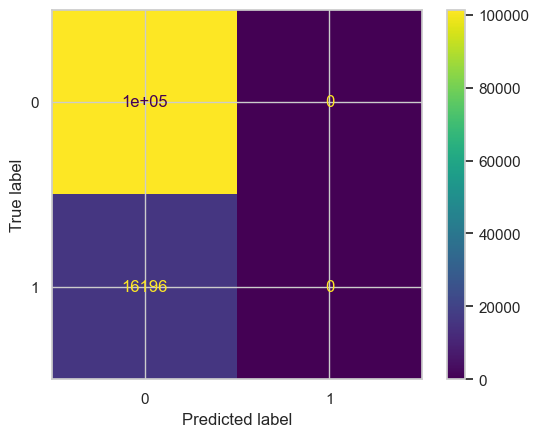

In [27]:
r=neural_network((50, 50),3500,'tanh','lbfgs','adaptive',X,y)
plot_confusion_matrix(r[2],X_test,y_test)

## Summary

Text(0.5, 1.0, 'Classifiers!')

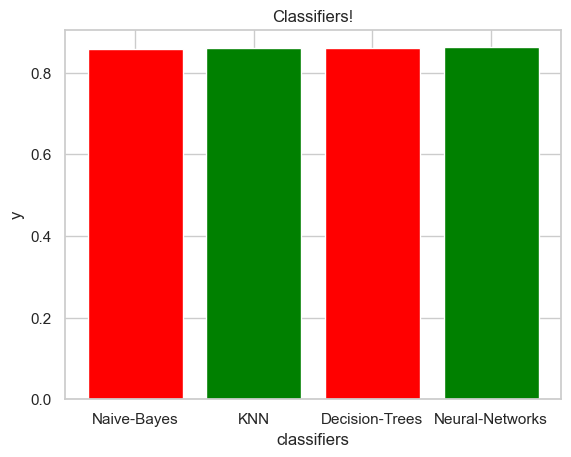

In [28]:
left = [1, 2, 3, 4]  
height = [0.857, 0.861,0.861,0.862]
tick_label = ['Naive-Bayes', 'KNN', 'Decision-Trees', 'Neural-Networks']
plt.bar(left, height, tick_label = tick_label,
        width = 0.8, color = ['red', 'green'])
plt.xlabel('classifiers')
plt.ylabel('y')
plt.title('Classifiers!')

## Linear Regression

Score: 0.0005214461207504462
Coef [0.14840291]
Intercept 0.1372232464436315
Predict [0.13722325 0.13722325 0.13722325 ... 0.13722325 0.13722325 0.13722325]


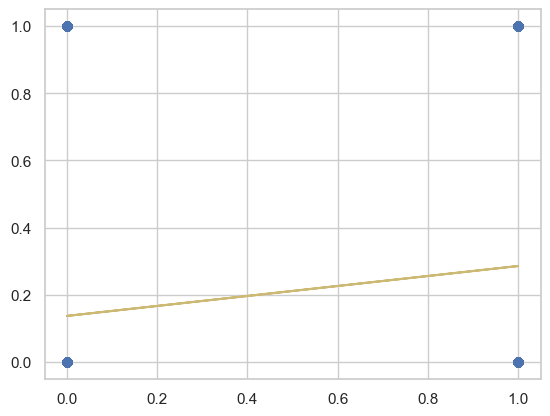

In [29]:
X=df["OTHER_DISEASE"].values.reshape(-1,1)
y = df["DEATH"].values.astype("int")

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
reg = LinearRegression().fit(X_train, y_train)
print("Score:",reg.score(X_test, y_test))

print("Coef",reg.coef_)

print("Intercept",reg.intercept_)

print("Predict",reg.predict(X_test))
plt.scatter(X_test, y_test,color ='b')
plt.plot(X_test, reg.predict(X_test),color ='y');
plt.show()

## LogisticRegression

Score: 0.8606663605285984
Coef [[0.91901749]]
Intercept [-1.83852029]
Predict [0 0 0 ... 0 0 0]


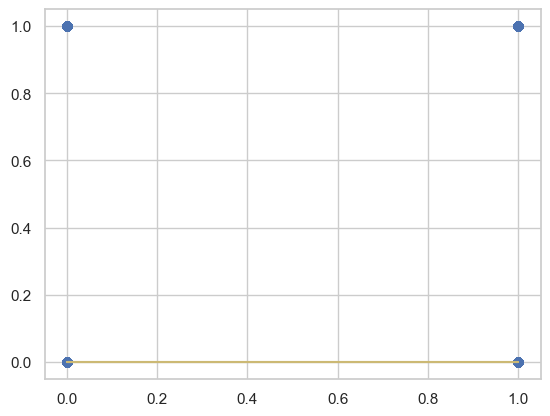

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
reg =LogisticRegression(random_state=16).fit(X_train, y_train)
print("Score:",reg.score(X_test, y_test))

print("Coef",reg.coef_)

print("Intercept",reg.intercept_)

print("Predict",reg.predict(X_test))
plt.scatter(X_test, y_test,color ='b')
plt.plot(X_test, reg.predict(X_test),color ='y');
plt.show()

In [31]:
repSex = {1: "Female", 2: "Male"}
df.replace({"SEX": repSex},inplace=True)

## Aprori

In [32]:
#Using TransactionEncoder, could take few minutes, I had to drop rows because it wouldn't compile
data = []
df_te=df.iloc[:2000]
df_te['PREGNANT']=change(df_te['PREGNANT'],[0.5],['NOT PREGNANT','PREGNANT'])
df_te['TOBACCO']=change(df_te['TOBACCO'],[0.5],["NOT TOBACOO","TOBACCO"])
df_te['OTHER_DISEASE']=change(df_te['OTHER_DISEASE'],[0.5],["NOT OTHER DISEASE","OTHER_DISEASE"])
df_te['OBESITY']=change(df_te['OBESITY'],[0.5],["NOT OBESITY","OBESITY"])
df_te['ASTHMA']=change(df_te['ASTHMA'],[0.5],['NOT ASTHMA','ASTHMA'])
df_te['DIABETES']=change(df_te['DIABETES'],[0.5],["NOT DIABETES","DIABETES"])
df_te['DEATH']=change(df_te['DEATH'],[0.5],["NO","YES"])
df_te = df_te.drop('MEDICAL_UNIT', axis=1)
df_te = df_te.drop('INTUBED', axis=1)
df_te = df_te.drop('USMER', axis=1)
df_te = df_te.drop('CARDIOVASCULAR', axis=1)
df_te = df_te.drop('HIPERTENSION', axis=1)
df_te = df_te.drop('PNEUMONIA', axis=1)
df_te = df_te.drop('RENAL_CHRONIC', axis=1)
df_te = df_te.drop('PATIENT_TYPE', axis=1)
df_te = df_te.drop('COPD', axis=1)

for i in range(0, df_te.shape[0]-1):
    data.append([str(df_te.values[i,j]) for j in range(0, df_te.shape[1])])

    
th = TransactionEncoder()
th_arr = th.fit(data).transform(data)
new_df = pd.DataFrame(th_arr,columns=th.columns_)
new_df.head()


,ASTHMA,Adult,Child,DIABETES,Female,Male,NO,NOT ASTHMA,NOT DIABETES,NOT OBESITY,...,NOT PREGNANT,NOT TOBACOO,OBESITY,OTHER_DISEASE,PREGNANT,Senior,TOBACCO,Teenager,Unknown,YES
0,False,False,False,False,True,False,False,True,True,True,...,True,True,False,False,False,True,False,False,False,True
1,False,True,False,False,False,True,False,True,True,True,...,True,True,False,False,False,False,False,False,False,True
2,False,False,False,False,False,True,False,True,True,True,...,True,True,False,False,False,True,False,False,False,True
3,False,True,False,False,True,False,True,True,True,True,...,True,True,False,False,False,False,False,False,False,False
4,False,False,False,False,True,False,True,True,True,True,...,True,True,False,False,False,True,False,False,False,False


In [33]:
apr = apriori(new_df,min_support = 0.2, use_colnames = th.columns_)
apr.head()

,support,itemsets
0,0.604802,(Adult)
1,0.397699,(Female)
2,0.602301,(Male)
3,0.419710,(NO)
4,0.996498,(NOT ASTHMA)


['antecedents' 'consequents' 'antecedent support' 'consequent support'
 'support' 'confidence' 'lift' 'leverage' 'conviction']
My configuration:  antecedent support  :  0.7
               antecedents                                        consequents  \
0             (NOT ASTHMA)                                            (Adult)   
1           (NOT DIABETES)                                            (Adult)   
2            (NOT OBESITY)                                            (Adult)   
3      (NOT OTHER DISEASE)                                            (Adult)   
4           (NOT PREGNANT)                                            (Adult)   
...                    ...                                                ...   
10572        (NOT OBESITY)  (NOT TOBACOO, Senior, NOT PREGNANT, NOT OTHER ...   
10573       (NOT PREGNANT)  (NOT TOBACOO, NOT OBESITY, Senior, NOT OTHER D...   
10574  (NOT OTHER DISEASE)  (NOT TOBACOO, NOT OBESITY, Senior, NOT PREGNAN...   
10575         (NO

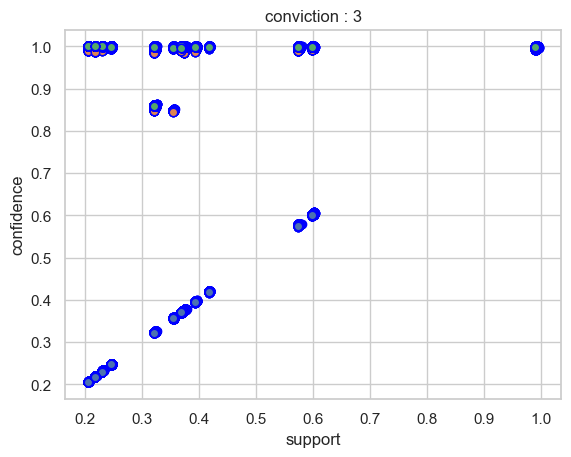

In [34]:
config = [ ('antecedent support',0.7),('confidence',0.8),('conviction',3)]
for metric, new_th in config:
    rules = association_rules(apr, metric = metric, min_threshold=new_th)
    if rules.empty:
        print("Dataframe is Empty")
    print(rules.columns.values)
    print("My configuration: ", metric, " : ",new_th)
    print(rules)
    
    support = rules.loc[:,"support"]
    confidence = rules.loc[:,'confidence']
    plt.scatter(support,confidence,edgecolors="blue")
    plt.xlabel('support')
    plt.ylabel('confidence')
    plt.title(metric+' : ' +str(new_th))
    plt.savefig('plot%03s.png'%(metric))

    

In [35]:
print(rules[rules['antecedents']==frozenset({"Male", "Senior", "NOT OTHER DISEASE"})].to_string())
print("\n-------------------------------------------\n")
print(rules[rules['antecedents']==frozenset({'Male'})].to_string())
print("\n-------------------------------------------\n")
print(rules[rules['antecedents']==frozenset({'Adult'})].to_string())
print("\n-------------------------------------------\n")

                            antecedents                  consequents  antecedent support  consequent support   support  confidence      lift  leverage  conviction
489   (Senior, NOT OTHER DISEASE, Male)                (NOT OBESITY)            0.218109            0.996998  0.218109         1.0  1.003011  0.000655         inf
501   (Senior, NOT OTHER DISEASE, Male)               (NOT PREGNANT)            0.218109            0.999500  0.218109         1.0  1.000501  0.000109         inf
1650  (Senior, NOT OTHER DISEASE, Male)  (NOT PREGNANT, NOT OBESITY)            0.218109            0.996498  0.218109         1.0  1.003514  0.000764         inf

-------------------------------------------

  antecedents     consequents  antecedent support  consequent support   support  confidence      lift  leverage  conviction
0      (Male)  (NOT PREGNANT)            0.602301              0.9995  0.602301         1.0  1.000501  0.000301         inf

-------------------------------------------

Empty Da